In [ ]:
!pip install datasets

In [ ]:
from datasets import load_dataset, Dataset

dataset = load_dataset("imdb", split='train')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
dataset

Dataset({
    features: ['text', 'label'],
    num_rows: 25000
})

In [ ]:
import pandas as pd

df = pd.DataFrame(dataset)
df

,text,label
0,I rented I AM CURIOUS-YELLOW from my video sto...,0
1,"""I Am Curious: Yellow"" is a risible and preten...",0
2,If only to avoid making this type of film in t...,0
3,This film was probably inspired by Godard's Ma...,0
4,"Oh, brother...after hearing about this ridicul...",0
...,...,...
24995,A hit at the time but now better categorised a...,1
24996,I love this movie like no other. Another time ...,1
24997,This film and it's sequel Barry Mckenzie holds...,1
24998,'The Adventures Of Barry McKenzie' started lif...,1


In [ ]:
df['label'].value_counts()

0    12500
1    12500
Name: label, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

# we will "truncate" the dataset
X, _, y, _ = train_test_split(df['text'], df['label'], test_size=0.975, stratify=df['label'], random_state=30)

# we will work with X and y
y.value_counts()

0    313
1    312
Name: label, dtype: int64

In [ ]:
corpus = X.tolist()
corpus[:2]

["Saw this flick on ENCW last nite for the third or fourth time. Enjoyed it so much I ordered the DVD. This really is a standout and of course the first of the Mann-Stewart pairings. More here than the usual oater, although not quite as powerful as The Searchers. Lots of obvious symbolism about achieving manhood but mainly it's the acting by Stewart, his partner Millard Mitchell, Shelly Winters and the Waco Johnny Dean- Dan Duryea. Steve Miller (not The Joker) is interesting as a handsome would be hero who's interested in Lola but too yellow . Like Stewart in The Man Who Killed Liberty Valance, he's practically reduced to putting on an apron and serving his enemies coffee. Decaf no doubt. Tony Curtis from the Bronx Cavalry and Rock Hudson behaving like no Indian I've seen on screen have interesting cameos.<br /><br />Special performances by John McIntire as a too lucky card dealing/gun trader who hangs out at a very low grade Western version of Rick's American Cafe. Nobody wants to spe

## Basic Text Preprocessing

In [ ]:
sample = corpus[:2]

### Tokenization

In [ ]:
# divide sentence into words, you can use regular expressions, etc
from nltk.tokenize import RegexpTokenizer

# list of list
list_tokens = []

tokenizer = RegexpTokenizer(r'\w+')
for sent in sample:
  tokens = tokenizer.tokenize(sent)
  tokens = [token.lower() for token in tokens if token != 'br']
  list_tokens.append(tokens)
  print(tokens)

['saw', 'this', 'flick', 'on', 'encw', 'last', 'nite', 'for', 'the', 'third', 'or', 'fourth', 'time', 'enjoyed', 'it', 'so', 'much', 'i', 'ordered', 'the', 'dvd', 'this', 'really', 'is', 'a', 'standout', 'and', 'of', 'course', 'the', 'first', 'of', 'the', 'mann', 'stewart', 'pairings', 'more', 'here', 'than', 'the', 'usual', 'oater', 'although', 'not', 'quite', 'as', 'powerful', 'as', 'the', 'searchers', 'lots', 'of', 'obvious', 'symbolism', 'about', 'achieving', 'manhood', 'but', 'mainly', 'it', 's', 'the', 'acting', 'by', 'stewart', 'his', 'partner', 'millard', 'mitchell', 'shelly', 'winters', 'and', 'the', 'waco', 'johnny', 'dean', 'dan', 'duryea', 'steve', 'miller', 'not', 'the', 'joker', 'is', 'interesting', 'as', 'a', 'handsome', 'would', 'be', 'hero', 'who', 's', 'interested', 'in', 'lola', 'but', 'too', 'yellow', 'like', 'stewart', 'in', 'the', 'man', 'who', 'killed', 'liberty', 'valance', 'he', 's', 'practically', 'reduced', 'to', 'putting', 'on', 'an', 'apron', 'and', 'servin

## Stemming

In [ ]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()
list_stemmed = []

for tokens in list_tokens:
  stemmed = []
  for token in tokens:
    stemmed.append(ps.stem(token))
  list_stemmed.append(stemmed)
  print(stemmed)

['saw', 'thi', 'flick', 'on', 'encw', 'last', 'nite', 'for', 'the', 'third', 'or', 'fourth', 'time', 'enjoy', 'it', 'so', 'much', 'i', 'order', 'the', 'dvd', 'thi', 'realli', 'is', 'a', 'standout', 'and', 'of', 'cours', 'the', 'first', 'of', 'the', 'mann', 'stewart', 'pair', 'more', 'here', 'than', 'the', 'usual', 'oater', 'although', 'not', 'quit', 'as', 'power', 'as', 'the', 'searcher', 'lot', 'of', 'obviou', 'symbol', 'about', 'achiev', 'manhood', 'but', 'mainli', 'it', 's', 'the', 'act', 'by', 'stewart', 'hi', 'partner', 'millard', 'mitchel', 'shelli', 'winter', 'and', 'the', 'waco', 'johnni', 'dean', 'dan', 'duryea', 'steve', 'miller', 'not', 'the', 'joker', 'is', 'interest', 'as', 'a', 'handsom', 'would', 'be', 'hero', 'who', 's', 'interest', 'in', 'lola', 'but', 'too', 'yellow', 'like', 'stewart', 'in', 'the', 'man', 'who', 'kill', 'liberti', 'valanc', 'he', 's', 'practic', 'reduc', 'to', 'put', 'on', 'an', 'apron', 'and', 'serv', 'hi', 'enemi', 'coffe', 'decaf', 'no', 'doubt', 

## Lemmatization

In [ ]:
import spacy

nlp = spacy.load('en_core_web_sm')
list_lemmatized = []

for tokens in list_tokens:
  doc = nlp(" ".join(tokens))
  lemmatized = [token.lemma_ for token in doc]
  list_lemmatized.append(lemmatized)
  print(lemmatized)

['see', 'this', 'flick', 'on', 'encw', 'last', 'nite', 'for', 'the', 'third', 'or', 'fourth', 'time', 'enjoy', 'it', 'so', 'much', 'I', 'order', 'the', 'dvd', 'this', 'really', 'be', 'a', 'standout', 'and', 'of', 'course', 'the', 'first', 'of', 'the', 'mann', 'stewart', 'pairing', 'more', 'here', 'than', 'the', 'usual', 'oater', 'although', 'not', 'quite', 'as', 'powerful', 'as', 'the', 'searcher', 'lot', 'of', 'obvious', 'symbolism', 'about', 'achieve', 'manhood', 'but', 'mainly', 'it', 's', 'the', 'acting', 'by', 'stewart', 'his', 'partner', 'millard', 'mitchell', 'shelly', 'winter', 'and', 'the', 'waco', 'johnny', 'dean', 'dan', 'duryea', 'steve', 'miller', 'not', 'the', 'joker', 'be', 'interesting', 'as', 'a', 'handsome', 'would', 'be', 'hero', 'who', 's', 'interested', 'in', 'lola', 'but', 'too', 'yellow', 'like', 'stewart', 'in', 'the', 'man', 'who', 'kill', 'liberty', 'valance', 'he', 's', 'practically', 'reduced', 'to', 'put', 'on', 'an', 'apron', 'and', 'serve', 'his', 'enemy'

## Stopwords Removal

In [ ]:
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
print(stop_words)

{'isn', 'wouldn', "aren't", 'about', 'some', 'was', 'so', 'll', 'below', 'such', 'than', 'were', 'herself', 'why', 'couldn', "doesn't", 'but', 'against', "she's", "you've", 'm', 'these', 'over', 'any', 'very', 'are', "isn't", 'here', 'y', 'through', 'that', 'itself', 'if', 'out', 'them', "haven't", 'each', "mightn't", 'before', 've', 'down', 'because', 'she', 'needn', "it's", 'his', "didn't", 'off', 'then', 'mustn', 'this', 'you', 'an', 'once', 'just', 'ma', 'between', 'above', 'and', 'its', 'whom', 'didn', "you'd", "mustn't", 'haven', "won't", 'until', 'is', 'ain', 'they', 'only', "hasn't", 'of', 'which', 'those', 'been', 'same', 'o', 'their', 'hers', 'ourselves', 'yourselves', 'a', 'being', 'has', 'had', 's', 'now', 'doing', 'me', 'ours', 'again', 'should', 'nor', 'yours', 'further', 'doesn', 'our', 'yourself', 'do', 'up', 'at', 'hasn', 'where', 'on', "wasn't", "should've", 'him', 'into', 'shan', 'what', 'themselves', 'or', "don't", 'will', 'after', 'd', 'i', 'have', 'having', 'be', 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# we'll use lemmatized version

list_final = []

for words in list_lemmatized:
  removed = []
  for word in words:
    if word not in stop_words:
      removed.append(word)
  print(removed)

['see', 'flick', 'encw', 'last', 'nite', 'third', 'fourth', 'time', 'enjoy', 'much', 'I', 'order', 'dvd', 'really', 'standout', 'course', 'first', 'mann', 'stewart', 'pairing', 'usual', 'oater', 'although', 'quite', 'powerful', 'searcher', 'lot', 'obvious', 'symbolism', 'achieve', 'manhood', 'mainly', 'acting', 'stewart', 'partner', 'millard', 'mitchell', 'shelly', 'winter', 'waco', 'johnny', 'dean', 'dan', 'duryea', 'steve', 'miller', 'joker', 'interesting', 'handsome', 'would', 'hero', 'interested', 'lola', 'yellow', 'like', 'stewart', 'man', 'kill', 'liberty', 'valance', 'practically', 'reduced', 'put', 'apron', 'serve', 'enemy', 'coffee', 'decaf', 'doubt', 'tony', 'curtis', 'bronx', 'cavalry', 'rock', 'hudson', 'behave', 'like', 'indian', 'I', 'see', 'screen', 'interesting', 'cameo', 'special', 'performance', 'john', 'mcintire', 'lucky', 'card', 'deal', 'gun', 'trader', 'hang', 'low', 'grade', 'western', 'version', 'rick', 'american', 'cafe', 'nobody', 'want', 'spend', 'night', 'ja

In [ ]:
# tokenization process can be handled by TfidfVectorizer
# process like lemmatization or stemming must be done separately
# stemming: rule-based, lemmatization: dictionary lookup

import spacy

nlp = spacy.load('en_core_web_sm')
lemmatized_corpus = []

for sentence in corpus:
  doc = nlp(sentence)
  lemmatized = [token.lemma_ for token in doc if str(token)]
  lemmatized_corpus.append(" ".join(lemmatized))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# sublinear tf is for 'normalization'
vectorizer = TfidfVectorizer(stop_words='english', sublinear_tf=True)

X = vectorizer.fit_transform(lemmatized_corpus)

In [ ]:
tokens = vectorizer.get_feature_names_out()
tokens.shape

(11621,)

In [ ]:
tokens[:100]

array(['00', '000', '0080', '00pm', '02', '05', '06', '08', '10', '100',
       '1000', '107', '10th', '11', '110', '116', '12', '120', '12th',
       '13', '131', '13th', '14', '1408', '14th', '15', '150', '157',
       '16', '16éme', '17', '18', '1824', '1850', '1890', '1895', '18th',
       '19', '1914', '1916', '1920s', '1924', '1926', '1927', '1930',
       '1933', '1934', '1936', '1939', '1940', '1944', '1945', '1948',
       '1950', '1950s', '1953', '1954', '1955', '1957', '1958', '1959',
       '1960', '1964', '1965', '1966', '1968', '1969', '1970', '1970s',
       '1971', '1972', '1973', '1974', '1977', '1978', '1980', '1980s',
       '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1990',
       '1991', '1994', '1995', '1996', '1997', '1998', '1999', '19th',
       '20', '2000', '2001', '2002', '2003', '2004', '2005'], dtype=object)

In [ ]:
X.shape

(625, 11621)

In [ ]:
# look at the df, very sparse (too many zeros)
df_tfidf = pd.DataFrame(data=X.toarray(), columns=tokens)
df_tfidf.head(10)

,00,000,0080,00pm,02,05,06,08,10,100,...,zoltan,zombi,zombie,zone,zoo,zoom,zorro,zp,zulu,zzzzzzzzzzzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.121829,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.119522,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058741,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


There are many disadvantages in using sparse representation, for example it costs lots of space. We will try different approach, such as using dense representation. To get the dense representation, you can use several techniques, such as using neural network-based LM, etc.

We are going to use sentence embedding, i.e. each sentence is represented by a certain vector. There is also word embedding, which means each word is represented by a certain vector.

In [ ]:
!pip install gensim

In [ ]:
!pip install -U sentence-transformers

## Sentence Transformer

In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer("all-MiniLM-L6-v2")

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [ ]:
# we may want to delete the html tags to improve thr quality of the embedding
corpus[0]

"Saw this flick on ENCW last nite for the third or fourth time. Enjoyed it so much I ordered the DVD. This really is a standout and of course the first of the Mann-Stewart pairings. More here than the usual oater, although not quite as powerful as The Searchers. Lots of obvious symbolism about achieving manhood but mainly it's the acting by Stewart, his partner Millard Mitchell, Shelly Winters and the Waco Johnny Dean- Dan Duryea. Steve Miller (not The Joker) is interesting as a handsome would be hero who's interested in Lola but too yellow . Like Stewart in The Man Who Killed Liberty Valance, he's practically reduced to putting on an apron and serving his enemies coffee. Decaf no doubt. Tony Curtis from the Bronx Cavalry and Rock Hudson behaving like no Indian I've seen on screen have interesting cameos.<br /><br />Special performances by John McIntire as a too lucky card dealing/gun trader who hangs out at a very low grade Western version of Rick's American Cafe. Nobody wants to spen

In [ ]:
import re

def remove_html_tags(text):
    clean_text = re.sub(r'<[^>]+>', '', text)
    return clean_text

no_tag_corpus = []
for text in corpus:
  no_tag_corpus.append(remove_html_tags(text))

In [ ]:
# since we are working with neural LM, preprocessing is not that important :)
# we can just work with corpus directly

embeddings = model.encode(no_tag_corpus, show_progress_bar=True, batch_size=16,
                          convert_to_numpy=True)

Batches:   0%|          | 0/40 [00:00<?, ?it/s]

In [ ]:
embeddings.shape

(625, 384)

In [ ]:
embeddings[:5]

array([[-0.00452936, -0.07815856, -0.11961856, ..., -0.01341748,
        -0.03048457, -0.05786847],
       [-0.05727576,  0.02903907, -0.04839392, ...,  0.00311453,
         0.00745587,  0.0408071 ],
       [-0.09145303, -0.0758906 ,  0.03321736, ..., -0.0048022 ,
        -0.03162595, -0.02853993],
       [-0.06088375, -0.01528078, -0.00733864, ...,  0.07169186,
        -0.05892884, -0.02467585],
       [ 0.01919127, -0.04424389,  0.00660097, ...,  0.09294066,
        -0.08684059, -0.02921846]], dtype=float32)

See the difference? (625, 384) vs (625, 11261), which one is better?

## Word2Vec

This is a word embedding technique to map words to vectors. There are two types of Word2Vec: Continuous Bag of Words (CBOW) and Skip-Gram.
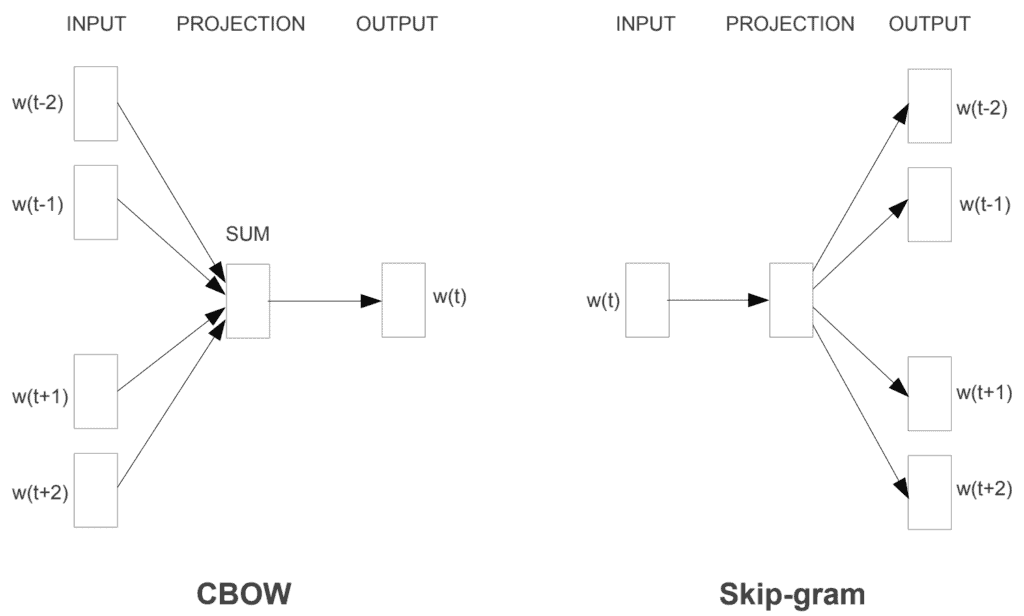

Source: https://towardsdatascience.com/nlp-101-word2vec-skip-gram-and-cbow-93512ee24314



The main difference is in CBOW, we want to predict center word based on context words, whereas in skip-gram, we want to predict context words based on the center word. Don't worry if you can't understand this pretty well. This tutorial just want you to know on how to use Word2Vec to generate embeddings. You will learn the detail about this more if you are interested in Large Language Models and NLP in general.

If you want to learn more about Word2Vec, this [blog](https://jalammar.github.io/illustrated-word2vec/) is a good one to start with :)

In [ ]:
# word2vec is a word embedding technique, which maps word to vector
from gensim.models import Word2Vec

In [ ]:
# word2vec receives list of lists of tokens, not list of sentences
import string
nltk.download('punkt')
tokenized_sentences = [[word for word in nltk.word_tokenize(sentence.lower()) if word not in string.punctuation]
                       for sentence in no_tag_corpus]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
len(tokenized_sentences)

625

In [ ]:
tokenized_sentences[0]

['saw',
 'this',
 'flick',
 'on',
 'encw',
 'last',
 'nite',
 'for',
 'the',
 'third',
 'or',
 'fourth',
 'time',
 'enjoyed',
 'it',
 'so',
 'much',
 'i',
 'ordered',
 'the',
 'dvd',
 'this',
 'really',
 'is',
 'a',
 'standout',
 'and',
 'of',
 'course',
 'the',
 'first',
 'of',
 'the',
 'mann-stewart',
 'pairings',
 'more',
 'here',
 'than',
 'the',
 'usual',
 'oater',
 'although',
 'not',
 'quite',
 'as',
 'powerful',
 'as',
 'the',
 'searchers',
 'lots',
 'of',
 'obvious',
 'symbolism',
 'about',
 'achieving',
 'manhood',
 'but',
 'mainly',
 'it',
 "'s",
 'the',
 'acting',
 'by',
 'stewart',
 'his',
 'partner',
 'millard',
 'mitchell',
 'shelly',
 'winters',
 'and',
 'the',
 'waco',
 'johnny',
 'dean-',
 'dan',
 'duryea',
 'steve',
 'miller',
 'not',
 'the',
 'joker',
 'is',
 'interesting',
 'as',
 'a',
 'handsome',
 'would',
 'be',
 'hero',
 'who',
 "'s",
 'interested',
 'in',
 'lola',
 'but',
 'too',
 'yellow',
 'like',
 'stewart',
 'in',
 'the',
 'man',
 'who',
 'killed',
 'liber

In [ ]:
# vector_size: dimension of the vector
# window: maximum distance between context words and center word
# min_count: ignores all words with total frequency (in the corpus) lower than this
# sg: 0 if cbow, otherwise skip-gram
# workers: to work with multicores
# cbow_mean: 0 if we want to use sum to combine the vectors of all context words, 1 if we want to use mean
# epochs: number of iteration
w2v = Word2Vec(tokenized_sentences, vector_size=200, window=5, min_count=10, sg=0,
               workers=2, cbow_mean=1, epochs=100)

In [ ]:
w2v.wv.most_similar(positive=['story'])

[('tale', 0.43424633145332336),
 ('plot', 0.35049962997436523),
 ('entirely', 0.33213192224502563),
 ('pace', 0.27234119176864624),
 ('girls', 0.25672295689582825),
 ('documentary', 0.25610387325286865),
 ('lives', 0.2528533339500427),
 ('true', 0.2433776557445526),
 ('mess', 0.24181145429611206),
 ('soundtrack', 0.23788896203041077)]

In [ ]:
w2v.wv.most_similar(positive=['film'])

[('movie', 0.5478914976119995),
 ('documentary', 0.3718203604221344),
 ('unfunny', 0.28183937072753906),
 ('flick', 0.27009209990501404),
 ('romantic', 0.2586551904678345),
 ('it', 0.2579587697982788),
 ('subject', 0.25380319356918335),
 ('level', 0.24621719121932983),
 ('references', 0.2451229691505432),
 ('mess', 0.24363794922828674)]

In [ ]:
w2v.wv.most_similar(positive=["music"])

[('soundtrack', 0.36345747113227844),
 ('numbers', 0.33683186769485474),
 ('score', 0.324429988861084),
 ('sequences', 0.3120436370372772),
 ('original', 0.3094509541988373),
 ('magnificent', 0.30712419748306274),
 ('wonderful', 0.30338558554649353),
 ('dialog', 0.3001018762588501),
 ('standards', 0.29321184754371643),
 ('storyline', 0.28818708658218384)]

Let's plot the result in a scatterplot to visualize the closeness of the words.

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

word = 'music'

similar = w2v.wv.most_similar(positive=[word])
word_vector_pairs = {}

word_vector_pairs[word] = w2v.wv[word]
for word, _ in similar:
  word_vector_pairs[word] = w2v.wv[word]

In [ ]:
# dimensionality reduction
pca = PCA(n_components=2)
embeddings = np.array(list(word_vector_pairs.values()))
embeddings.shape

(11, 200)

In [ ]:
embeddings_2d = pca.fit_transform(embeddings)

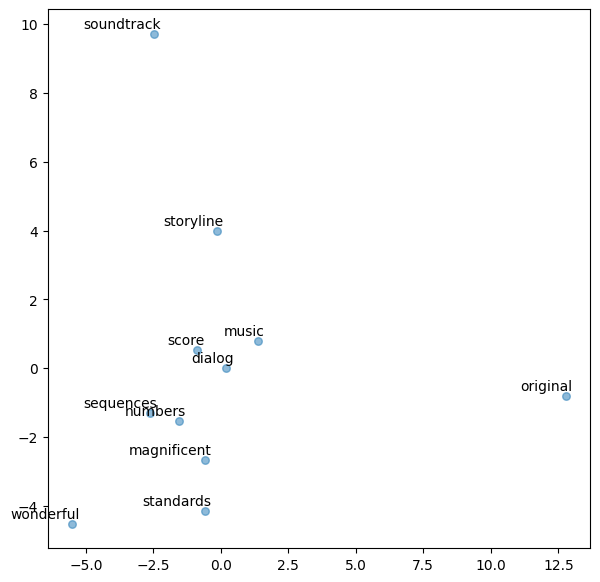

In [ ]:
plt.figure(figsize=(7, 7))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], marker='o', s=30, alpha=0.5)

# Annotate words for visualization
for i, word in enumerate(list(word_vector_pairs.keys())):
    plt.annotate(word, xy=(embeddings_2d[i, 0], embeddings_2d[i, 1]), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
plt.show()

What if the word doesn't appear in the corpus?

In [ ]:
w2v.wv.most_similar(positive=['queen'])

KeyError: "Key 'queen' not present in vocabulary"

There is another method called **FastText** to handle this situation. You can go explore about that by yourselves.

How to generate sentence embedding? Average the word embeddings!

In [ ]:
import numpy as np
embeddings_w2v = []

for sent in tokenized_sentences:
  all_embed = []
  for word in sent:
    try:
      word_embed = w2v.wv[word]
    except:
      continue
    all_embed.append(word_embed)
  all_embed = np.array(all_embed)
  # average those embeddings
  mean = np.mean(all_embed, axis=0)
  embeddings_w2v.append(mean)

embeddings_w2v = np.array(embeddings_w2v)
embeddings_w2v.shape

(625, 200)

In [ ]:
embeddings_w2v

array([[ 0.0222559 ,  0.1569364 , -0.07930358, ...,  0.08441447,
         0.23767026, -0.0550425 ],
       [ 0.10443027,  0.12457647,  0.00967652, ...,  0.01138082,
         0.15203337,  0.11676798],
       [ 0.12480783,  0.12184461, -0.02600235, ...,  0.35474855,
         0.25171694, -0.03058526],
       ...,
       [ 0.14636531,  0.24141298,  0.13730504, ...,  0.06146986,
         0.17739332,  0.0334432 ],
       [-0.01035888,  0.06318112,  0.06287879, ...,  0.14513215,
         0.2717099 ,  0.00778223],
       [-0.00701764,  0.21747896,  0.20853764, ...,  0.34814498,
         0.26321095, -0.07468148]], dtype=float32)